### **Data Loading and Inspecting**

In [1]:
# Importing of necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Loading of datasets
customer_demographics = pd.read_csv(r"C:\Users\ADMIN\Desktop\Data Science Task\data\CustomerDemographics.csv")
product_info = pd.read_csv(r"C:\Users\ADMIN\Desktop\Data Science Task\data\ProductInfo.csv")
trans_1 = pd.read_csv(r"C:\Users\ADMIN\Desktop\Data Science Task\data\Transactional_data_retail_01.csv")
trans_2 = pd.read_csv(r"C:\Users\ADMIN\Desktop\Data Science Task\data\Transactional_data_retail_02.csv")

In [3]:
# Inspecting of each dataset
print(customer_demographics.head())
print(customer_demographics.shape)

print(product_info.head())
print(product_info.shape)

print(trans_1.head())
print(trans_1.shape)

print(trans_2.head())
print(trans_2.shape)


   Customer ID         Country
0        13085  United Kingdom
1        13078  United Kingdom
2        15362  United Kingdom
3        18102  United Kingdom
4        12682          France
(49, 2)
  StockCode                          Description
0    85123A   WHITE HANGING HEART T-LIGHT HOLDER
1     71053                  WHITE METAL LANTERN
2    84406B       CREAM CUPID HEARTS COAT HANGER
3    84029G  KNITTED UNION FLAG HOT WATER BOTTLE
4    84029E       RED WOOLLY HOTTIE WHITE HEART.
(8818, 2)
  Invoice StockCode  Quantity  Price  Customer ID       InvoiceDate
0  489434     85048        12   6.95      13085.0  01 December 2021
1  489434    79323P        12   6.75      13085.0  01 December 2021
2  489434    79323W        12   6.75      13085.0  01 December 2021
3  489434     22041        48   2.10      13085.0  01 December 2021
4  489434     21232        24   1.25      13085.0  01 December 2021
(525461, 6)
  Invoice StockCode  Quantity  Price  Customer ID InvoiceDate
0  536365    85123A 

In [4]:
print(customer_demographics.info())
print("-" * 50) 
print(product_info.info())
print("-" * 50) 
print(trans_1.info())
print("-" * 50) 
print(trans_2.info())
print("-" * 50) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  49 non-null     int64 
 1   Country      49 non-null     object
dtypes: int64(1), object(1)
memory usage: 916.0+ bytes
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8818 entries, 0 to 8817
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StockCode    8818 non-null   object
 1   Description  6367 non-null   object
dtypes: object(2)
memory usage: 137.9+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode  

### **Data Cleaning**

In [5]:
# Check for Missing Values
print(customer_demographics.isnull().sum())
print(product_info.isnull().sum())
print(trans_1.isnull().sum())
print(trans_2.isnull().sum())

product_info.shape,trans_1.shape,trans_2.shape

Customer ID    0
Country        0
dtype: int64
StockCode         0
Description    2451
dtype: int64
Invoice             0
StockCode           0
Quantity            0
Price               0
Customer ID    107927
InvoiceDate         0
dtype: int64
Invoice             0
StockCode           0
Quantity            0
Price               0
Customer ID    135080
InvoiceDate         0
dtype: int64


((8818, 2), (525461, 6), (541910, 6))

In [6]:
# Drop rows with missing values
product_info.dropna(subset=['Description'],inplace=True)
trans_1.dropna(subset=['Customer ID'], inplace=True)
trans_2.dropna(subset=['Customer ID'], inplace=True)

# Check again after removal of missing values
print(customer_demographics.isnull().sum())
print(product_info.isnull().sum())
print(trans_1.isnull().sum())
print(trans_2.isnull().sum())

product_info.shape,trans_1.shape,trans_2.shape

Customer ID    0
Country        0
dtype: int64
StockCode      0
Description    0
dtype: int64
Invoice        0
StockCode      0
Quantity       0
Price          0
Customer ID    0
InvoiceDate    0
dtype: int64
Invoice        0
StockCode      0
Quantity       0
Price          0
Customer ID    0
InvoiceDate    0
dtype: int64


((6367, 2), (417534, 6), (406830, 6))

In [7]:
# Check for Duplicates
print(customer_demographics.duplicated().sum())
print(product_info.duplicated().sum())
print(trans_1.duplicated().sum())
print(trans_2.duplicated().sum())

product_info.shape,trans_1.shape,trans_2.shape

0
0
6772
5228


((6367, 2), (417534, 6), (406830, 6))

In [8]:
# Remove Dulicates
trans_1.drop_duplicates(inplace=True)
trans_2.drop_duplicates(inplace=True)

product_info.shape,trans_1.shape,trans_2.shape

# Check again after removal of duplicate values
print(trans_1.duplicated().sum())
print(trans_2.duplicated().sum())

product_info.shape,trans_1.shape,trans_2.shape

0
0


((6367, 2), (410762, 6), (401602, 6))

In [9]:
# Correcting Data Types

# Convert InvoiceDate to datetime
trans_1['InvoiceDate'] = pd.to_datetime(trans_1['InvoiceDate'],errors='coerce',dayfirst=True)
trans_2['InvoiceDate'] = pd.to_datetime(trans_2['InvoiceDate'],errors='coerce',dayfirst=True)

# Check for any errors
print(trans_1['InvoiceDate'].isnull().sum())
print(trans_2['InvoiceDate'].isnull().sum())

0
0


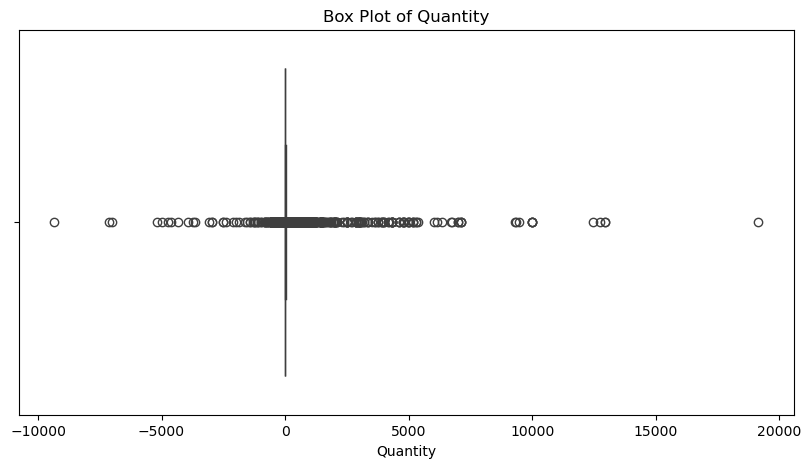

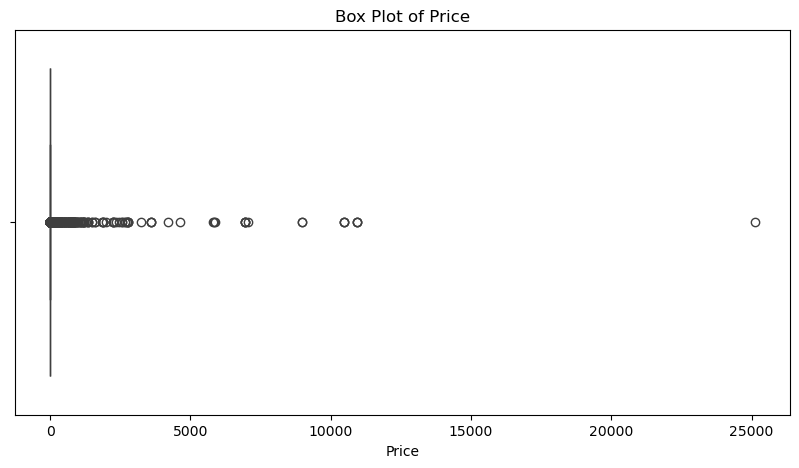

((410762, 6), (401602, 6))

In [10]:
# Handling of Outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Before removing he outliers let's visualize
# Visualize Quantity
plt.figure(figsize=(10, 5))
sns.boxplot(x=trans_1['Quantity'])
plt.title('Box Plot of Quantity')
plt.show()

# Visualize Price
plt.figure(figsize=(10, 5))
sns.boxplot(x=trans_1['Price'])
plt.title('Box Plot of Price')
plt.show()


trans_1.shape,trans_2.shape

In [11]:
# Loop through numerical columns to detect outliers in trans_1
for column in trans_1.select_dtypes(include=[np.number]).columns:
    Q1 = trans_1[column].quantile(0.25)
    Q3 = trans_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count and display outliers
    outliers_count = trans_1[(trans_1[column] < lower_bound) | (trans_1[column] > upper_bound)].shape[0]
    print(f"{column}: Lower Bound: {lower_bound}, Upper Bound: {upper_bound}, Number of Outliers: {outliers_count}")

for column_2 in trans_2.select_dtypes(include=[np.number]).columns:
    Q1_2 = trans_2[column_2].quantile(0.25)
    Q3_2 = trans_2[column_2].quantile(0.75)
    IQR_2 = Q3_2 - Q1_2
    lower_bound_2 = Q1_2 - 1.5 * IQR_2
    upper_bound_2 = Q3_2 + 1.5 * IQR_2
    outliers_count_2 = trans_2[(trans_2[column_2] < lower_bound_2) | (trans_2[column_2] > upper_bound_2)].shape[0]
    print(f"{column_2}: Lower Bound: {lower_bound_2}, Upper Bound: {upper_bound_2}, Number of Outliers for trans_2:  {outliers_count_2}")
    
trans_1.shape,trans_2.shape

Quantity: Lower Bound: -13.0, Upper Bound: 27.0, Number of Outliers: 27342
Price: Lower Bound: -2.5, Upper Bound: 7.5, Number of Outliers: 34703
Customer ID: Lower Bound: 9752.0, Upper Bound: 21024.0, Number of Outliers: 0
Quantity: Lower Bound: -13.0, Upper Bound: 27.0, Number of Outliers for trans_2:  26645
Price: Lower Bound: -2.5, Upper Bound: 7.5, Number of Outliers for trans_2:  35803
Customer ID: Lower Bound: 9671.5, Upper Bound: 21051.5, Number of Outliers for trans_2:  0


((410762, 6), (401602, 6))

In [12]:
# Remove outliers
trans_1 = trans_1[(trans_1['Quantity']>=-13.0) & (trans_1['Quantity'] <= 27.0)]
trans_1 = trans_1[(trans_1['Price']>=-2.5) & (trans_1['Price']<=7.5)]

trans_2 = trans_2[(trans_2['Quantity']>=-13.0) & (trans_2['Quantity'] <= 27.0)]
trans_2 = trans_2[(trans_2['Price']>=-2.5) & (trans_2['Price']<=7.5)]

trans_1.shape,trans_2.shape

((349024, 6), (339451, 6))

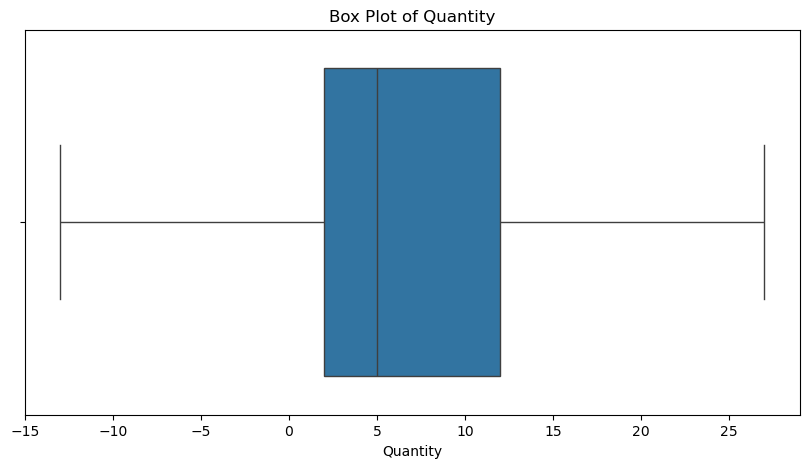

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=trans_1['Quantity'])
plt.title('Box Plot of Quantity')
plt.show()

In [14]:
# Data Integration

# Combine transactional data
transactional_data = pd.concat([trans_1, trans_2], ignore_index=True)
# Merge with CustomerDemographics
transactional_data = pd.merge(transactional_data, customer_demographics, on="Customer ID", how="left")

# Merge with ProductInfo
transactional_data = pd.merge(transactional_data, product_info, on="StockCode", how="left")

In [15]:
print(transactional_data.info())
print(transactional_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103043 entries, 0 to 1103042
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1103043 non-null  object        
 1   StockCode    1103043 non-null  object        
 2   Quantity     1103043 non-null  int64         
 3   Price        1103043 non-null  float64       
 4   Customer ID  1103043 non-null  float64       
 5   InvoiceDate  1103043 non-null  datetime64[ns]
 6   Country      34325 non-null    object        
 7   Description  1102466 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 67.3+ MB
None
  Invoice StockCode  Quantity  Price  Customer ID InvoiceDate         Country  \
0  489434     85048        12   6.95      13085.0  2021-12-01  United Kingdom   
1  489434    79323P        12   6.75      13085.0  2021-12-01  United Kingdom   
2  489434    79323P        12   6.75      13085.

In [16]:
# Total Records
transactional_data.shape

(1103043, 8)

In [17]:
# Feature Engineering

# Calculating the revenue for each transaction
transactional_data['Revenue'] = transactional_data['Quantity'] * transactional_data['Price']

# Deriving additional features from InvoiceDate to capture the seasonality and trends
transactional_data['Year'] = transactional_data['InvoiceDate'].dt.year
transactional_data['Month'] = transactional_data['InvoiceDate'].dt.month
transactional_data['Week'] = transactional_data['InvoiceDate'].dt.isocalendar().week
transactional_data['DayOfWeek'] = transactional_data['InvoiceDate'].dt.dayofweek

# Preparing data for time series analysis
# Aggregate weekly sales for each product
weekly_sales = transactional_data.groupby(['StockCode', 'Year', 'Week']).agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Create a datetime column representing the week
weekly_sales['WeekStart'] = transactional_data.groupby(['StockCode', 'Year', 'Week'])['InvoiceDate'].min().reset_index()['InvoiceDate']

transactional_data.shape


(1103043, 13)

In [18]:
transactional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103043 entries, 0 to 1103042
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1103043 non-null  object        
 1   StockCode    1103043 non-null  object        
 2   Quantity     1103043 non-null  int64         
 3   Price        1103043 non-null  float64       
 4   Customer ID  1103043 non-null  float64       
 5   InvoiceDate  1103043 non-null  datetime64[ns]
 6   Country      34325 non-null    object        
 7   Description  1102466 non-null  object        
 8   Revenue      1103043 non-null  float64       
 9   Year         1103043 non-null  int32         
 10  Month        1103043 non-null  int32         
 11  Week         1103043 non-null  UInt32        
 12  DayOfWeek    1103043 non-null  int32         
dtypes: UInt32(1), datetime64[ns](1), float64(3), int32(3), int64(1), object(4)
memory usage: 93.6+ MB


In [19]:
transactional_data.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Country,Description,Revenue,Year,Month,Week,DayOfWeek
0,489434,85048,12,6.95,13085.0,2021-12-01,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4,2021,12,48,2
1,489434,79323P,12,6.75,13085.0,2021-12-01,United Kingdom,PINK CHERRY LIGHTS,81.0,2021,12,48,2
2,489434,79323P,12,6.75,13085.0,2021-12-01,United Kingdom,"Unsaleable, destroyed.",81.0,2021,12,48,2
3,489434,79323W,12,6.75,13085.0,2021-12-01,United Kingdom,WHITE CHERRY LIGHTS,81.0,2021,12,48,2
4,489434,79323W,12,6.75,13085.0,2021-12-01,United Kingdom,"Unsaleable, destroyed.",81.0,2021,12,48,2


In [20]:
# Handling Inconsistent Data

# Standardize Text Data
# like triming whitespace and converting it to consistent case
transactional_data['Country'] = transactional_data['Country'].str.strip().str.title()
transactional_data['Description'] = transactional_data['Description'].str.strip().str.title()

# Address Inconsistencies
print(transactional_data['Country'].unique())

# Correct any misspellings or inconsistencies manually or programmatically
transactional_data['Country'] = transactional_data['Country'].replace({
    'Uk': 'United Kingdom', 'Aus': 'Australia', 'France':'France','Nls': 'Netherlands','Blg':'Belgium',
    'Usa': 'USA',
    # Add other corrections as needed
})

['United Kingdom' 'France' 'Australia' nan 'Netherlands' 'Belgium']


In [52]:
# Impute missing countries with 'Unknown'
transactional_data['Country'] = transactional_data['Country'].fillna('Unknown')

# Impute missing descriptions with 'Unknown'
transactional_data['Description'] = transactional_data['Description'].fillna('Unknown')

In [54]:
# Final Data Validation
print(transactional_data.isnull().sum())
print(transactional_data.describe())

Invoice        0
StockCode      0
Quantity       0
Price          0
Customer ID    0
InvoiceDate    0
Country        0
Description    0
Revenue        0
Year           0
Month          0
Week           0
DayOfWeek      0
dtype: int64
           Quantity         Price   Customer ID  \
count  1.103043e+06  1.103043e+06  1.103043e+06   
mean   7.181507e+00  2.396844e+00  1.534072e+04   
min   -1.300000e+01  0.000000e+00  1.234600e+04   
25%    2.000000e+00  1.250000e+00  1.398200e+04   
50%    6.000000e+00  1.950000e+00  1.529800e+04   
75%    1.200000e+01  2.950000e+00  1.680900e+04   
max    2.700000e+01  7.500000e+00  1.828700e+04   
std    6.749367e+00  1.647293e+00  1.695833e+03   

                         InvoiceDate       Revenue          Year  \
count                        1103043  1.103043e+06  1.103043e+06   
mean   2022-12-29 01:35:14.788635136  1.333682e+01  2.022415e+03   
min              2021-12-01 00:00:00 -8.775000e+01  2.021000e+03   
25%              2022-07-01 00:00:

In [55]:
# Save the Preprocessed Data
transactional_data.to_csv("Preprocessed_Transactional_Data.csv", index=False)